<a id='intro'></a>
## Introduction

In this project i will go through all the 3 tidy data of customer satisfaction xlsx file. 

The main goal will be to determine what are the main variables that affect the overall customer satifaction for TelCo. compaany and why there is a significant decreess in it and significant increase in call volume. 

In addition, i will identify some recommendations that could solve this issue.

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# import the data sheets into different data set
customer_satisfaction= pd.read_excel('Dataset - Data Analyst Vacancy.xlsx', sheet_name='Customer Satisfaction Results')
agen_info= pd.read_excel('Dataset - Data Analyst Vacancy.xlsx', sheet_name='Agent Information')
account_interaction= pd.read_excel('Dataset - Data Analyst Vacancy.xlsx', sheet_name='Account Interactions')


In [3]:
# merge the two main data sets (customer_satisfaction & account_interaction) into one data frame
df_merge= pd.merge(customer_satisfaction,account_interaction)
df_merge.head()

,Account Number,Interaction ID,Call Date,Agent ID,1. Overall Experience?,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable,Call Reason,Call Resolution
0,9000001,1234501,2010-04-15,1,3,2,1,3,1,Add Services,Transfer (Other Dept)
1,9000031,1234506,2010-04-15,1,4,3,3,4,4,Billing Dispute,Credit Account
2,9000060,1234521,2010-04-16,1,2,4,3,5,4,Make Payment,Phone Disconnect
3,9000024,1234525,2010-04-17,1,3,4,4,3,4,Billing Question,Explain Bill (no changes made)
4,9000025,1234542,2010-04-19,1,5,5,4,5,5,Make Payment,Process Payment


In [4]:
df2_merge= pd.merge(df_merge, agen_info)
df2_merge.head()


,Account Number,Interaction ID,Call Date,Agent ID,1. Overall Experience?,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable,Call Reason,Call Resolution,Agent Name,Agent Role,Agent Tenure
0,9000001,1234501,2010-04-15,1,3,2,1,3,1,Add Services,Transfer (Other Dept),"Smith, John",Tier 1,0-30
1,9000031,1234506,2010-04-15,1,4,3,3,4,4,Billing Dispute,Credit Account,"Smith, John",Tier 1,0-30
2,9000060,1234521,2010-04-16,1,2,4,3,5,4,Make Payment,Phone Disconnect,"Smith, John",Tier 1,0-30
3,9000024,1234525,2010-04-17,1,3,4,4,3,4,Billing Question,Explain Bill (no changes made),"Smith, John",Tier 1,0-30
4,9000025,1234542,2010-04-19,1,5,5,4,5,5,Make Payment,Process Payment,"Smith, John",Tier 1,0-30


In [5]:
customer_satisfaction.head()

,Account Number,Interaction ID,Call Date,Agent ID,1. Overall Experience?,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable
0,9000001,1234501,2010-04-15,1,3,2,1,3,1
1,9000031,1234506,2010-04-15,1,4,3,3,4,4
2,9000060,1234521,2010-04-16,1,2,4,3,5,4
3,9000024,1234525,2010-04-17,1,3,4,4,3,4
4,9000025,1234542,2010-04-19,1,5,5,4,5,5


In [6]:
agen_info.head()

,Agent ID,Agent Name,Agent Role,Agent Tenure
0,1,"Smith, John",Tier 1,0-30
1,2,"Jones, Amanda",Tier 2,60-90
2,3,"Davis, Kelly",Tier 2,120+
3,4,"Miller, Ross",Tier 1,0-30
4,5,"Johnson, Emily",Tier 1,0-30


In [7]:
account_interaction.head()

,Account Number,Interaction ID,Call Date,Call Reason,Call Resolution,Agent ID
0,9000001,1234501,2010-04-15,Add Services,Transfer (Other Dept),1
1,9000010,1234502,2010-04-15,Make Payment,Explain Bill (no changes made),9
2,9000010,1234503,2010-04-15,Make Payment,Phone Disconnect,10
3,9000019,1234504,2010-04-15,Make Payment,Process Payment,2
4,9000029,1234505,2010-04-15,Add Services,Add Minutes,9


<a id='wrangling'></a>
## Data Wrangling

In these section i will clean data from any reduancey and tirm data if need it.


In [8]:
# Identify how many row and column dataset have
customer_satisfaction.shape

(126, 9)

In [9]:
# Go through describtive statistic information.
customer_satisfaction.describe()

,Account Number,Interaction ID,Agent ID,1. Overall Experience?,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable
count,1.260000e+02,1.260000e+02,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,9.000051e+06,1.234564e+06,5.563492,3.912698,3.904762,3.841270,4.023810,4.015873
std,2.959661e+01,3.651712e+01,2.832655,1.027773,1.069045,1.105714,0.880584,0.987799
min,9.000001e+06,1.234501e+06,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,9.000025e+06,1.234532e+06,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,9.000050e+06,1.234564e+06,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,9.000076e+06,1.234595e+06,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,9.000100e+06,1.234626e+06,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000


* we can see that the mean of overall satisfaction is around 3.9 that is almost the same for agent quality of service and resolve issue, but it is around 4.0 for courteous and knowledgeable.

* we can also see that courteous has the highest minimun number which is 2.0 and almost 50% of clinets has rated 4 for all variables.

In [10]:
# Identify how many row and column dataset have
agen_info.shape

(10, 4)

In [11]:
# Identify how many row and column dataset have
account_interaction.shape

(126, 6)

In [12]:
# look for unique values at the data set
account_interaction.nunique()

Account Number     100
Interaction ID     126
Call Date           13
Call Reason          8
Call Resolution     10
Agent ID            10
dtype: int64

 * There is only 8 reasons for calling and 10 resolution.
 * All the 10 agent involved in the interaction.

In [13]:
# look at how many duplicated rows
sum(customer_satisfaction.duplicated())

0

* There is no duplicated rows.

In [14]:
# look at how many duplicated rows
sum(account_interaction.duplicated())

0

* There is no duplicated rows.


<a id='eda'></a>
## Exploratory Data Analysis


In this section i will see the relationship amonge all variables and try to find usefull analysis for customer satisfaction.

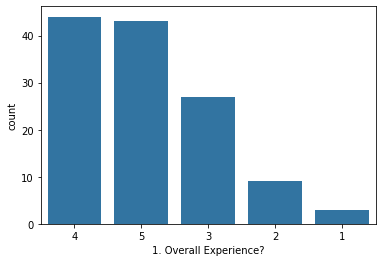

In [15]:
# first we will look at the overall customer experience 
# plot overall experience in charts
base_color = sns.color_palette()[0]
order_Overall= customer_satisfaction['1. Overall Experience?'].value_counts().index
sns.countplot( data= customer_satisfaction, x= '1. Overall Experience?', color= base_color, order= order_Overall);

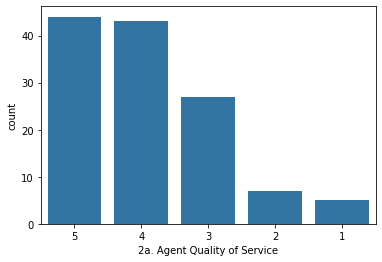

In [16]:
# plot agent quality of servies
order_Agent_qual= customer_satisfaction['2a. Agent Quality of Service'].value_counts().index
sns.countplot(data= customer_satisfaction, x= '2a. Agent Quality of Service', color= base_color , order= order_Agent_qual);

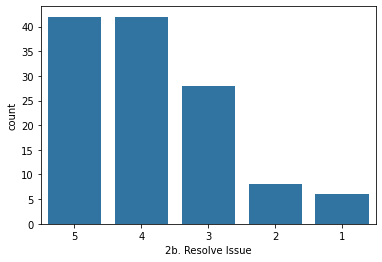

In [17]:
# plot Resolve issue 
order_resolve_issue= customer_satisfaction['2b. Resolve Issue'].value_counts().index
sns.countplot(data= customer_satisfaction, x= '2b. Resolve Issue', color= base_color , order= order_resolve_issue);


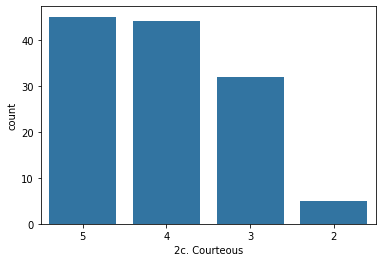

In [18]:
# plot courteous
order_courteous= customer_satisfaction['2c. Courteous'].value_counts().index
sns.countplot(data= customer_satisfaction, x= '2c. Courteous', color= base_color , order= order_courteous);


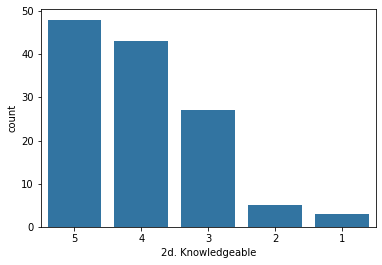

In [19]:
# plot Knowledgeable
order_Knowledgeable= customer_satisfaction['2d. Knowledgeable'].value_counts().index
sns.countplot(data= customer_satisfaction, x= '2d. Knowledgeable', color= base_color , order= order_Knowledgeable);


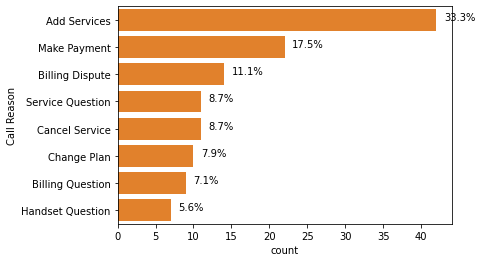

In [46]:
# second we will look at the account interaction
# plot the reason of call
base_color2= sns.color_palette()[1]
order_call_reason= account_interaction['Call Reason'].value_counts().index
call_reason_count= account_interaction['Call Reason'].value_counts()
n_reasons= account_interaction['Call Reason'].value_counts().sum()
sns.countplot(data= account_interaction, y='Call Reason', color= base_color2, order= order_call_reason);

for i in range (call_reason_count.shape[0]):
  count= call_reason_count[i]
  pct_string= '{:0.1f}%'.format(100*count/n_reasons)
  plt.text(count+1, i, pct_string)

* The bar chart indicates that arround 33.3% of overall customers calling for add servies which is adding more minutes and/ or texts to their account.

* the next highest reaon for call is make payment on their account, around 17.5%


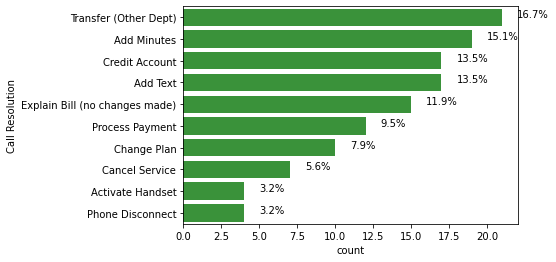

In [45]:
# plot the Call resolution
base_color3=sns.color_palette()[2]
order_call_resolution= account_interaction['Call Resolution'].value_counts().index
call_resolution_count= account_interaction['Call Resolution'].value_counts()
n_resolution= account_interaction['Call Resolution'].value_counts().sum()
sns.countplot(data= account_interaction, y='Call Resolution', color= base_color3, order= order_call_resolution);

for i in range (call_resolution_count.shape[0]):
  count= call_resolution_count[i]
  pct_string= '{:0.1f}%'.format(100*count/n_resolution)
  plt.text(count+1, i, pct_string)

* the highest resolution that agent took was transfer to other depertment by around 16.7%
* comes in the next place add minutes to their account by 15.1%

In [22]:
# Scan agent over all tenure based on the their role
agent_role= agen_info.groupby(['Agent Role','Agent Tenure']).size()
agent_role= agent_role.reset_index(name= 'type ')
agent_role= agent_role.pivot(index= 'Agent Tenure', columns= 'Agent Role' )
agent_role

type        
Agent Role   Tier 1 Tier 2
Agent Tenure              
0-30            4.0    NaN
120+            NaN    1.0
30-60           2.0    NaN
60-90           NaN    2.0
90-120          NaN    1.0

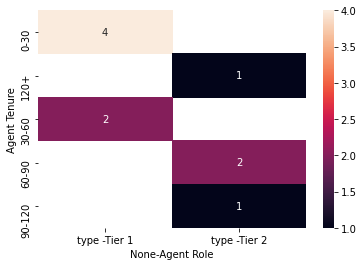

In [23]:
# heatmape to see the count for values
sns.heatmap(agent_role, annot= True);

* Tier 1 which are the first level of support are taking the lowest days dealing and working with clients in the orgaizations which are between 0 to 60 days.

* Tier 2 which are the escalated level of support clinets are in the orgization for more than 60 to 120+ .

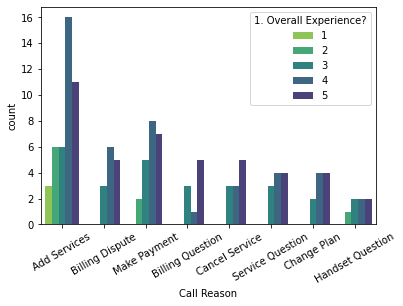

In [24]:
# see the overall experiance aline with the call reasoning
cluster_Reason_rate= sns.countplot(data= df2_merge, x= 'Call Reason', hue='1. Overall Experience?',  palette='viridis_r');
cluster_Reason_rate.set_xticklabels(cluster_Reason_rate.get_xticklabels(),rotation=30);

* the highest count of call reasoning is for add services as we mention befor.
* we can see that the highest unsatisfaied level where when clients calls to add services, followed with making payment. 
* clinets who calls for anything but add services, make payment or handest quesiton have a relatively good experiance and satisfaction level compered to others.


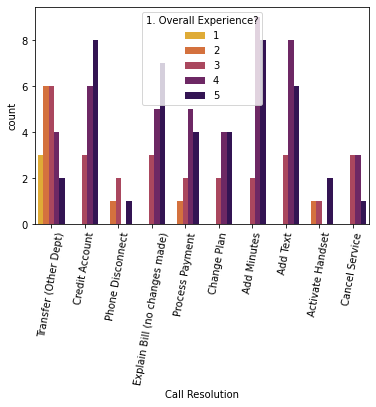

In [48]:
# see the satisafaction rate aline with the call resolution
cluster_Resolution_rate= sns.countplot(data= df2_merge, x= 'Call Resolution', hue='1. Overall Experience?', palette='inferno_r');
cluster_Resolution_rate.set_xticklabels(cluster_Resolution_rate.get_xticklabels(),rotation=80);

* when agent transfer the clinet to other department as to resolve their issue or the phone call disconnected are the highest unsatisfied overall experiance of the customers.
* moreover, adding text, minutes, adding credit to client account and explain bills are the highest in term of satisfaction level. 

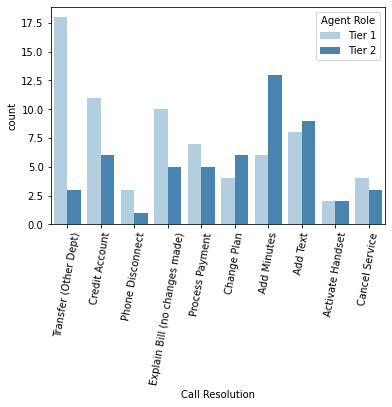

In [51]:
# see the Agent role aline with the call resolution
cluster_Resolution_role_rate= sns.countplot(data= df2_merge, x= 'Call Resolution', hue='Agent Role', palette='Blues');
cluster_Resolution_role_rate.set_xticklabels(cluster_Resolution_role_rate.get_xticklabels(),rotation=80);

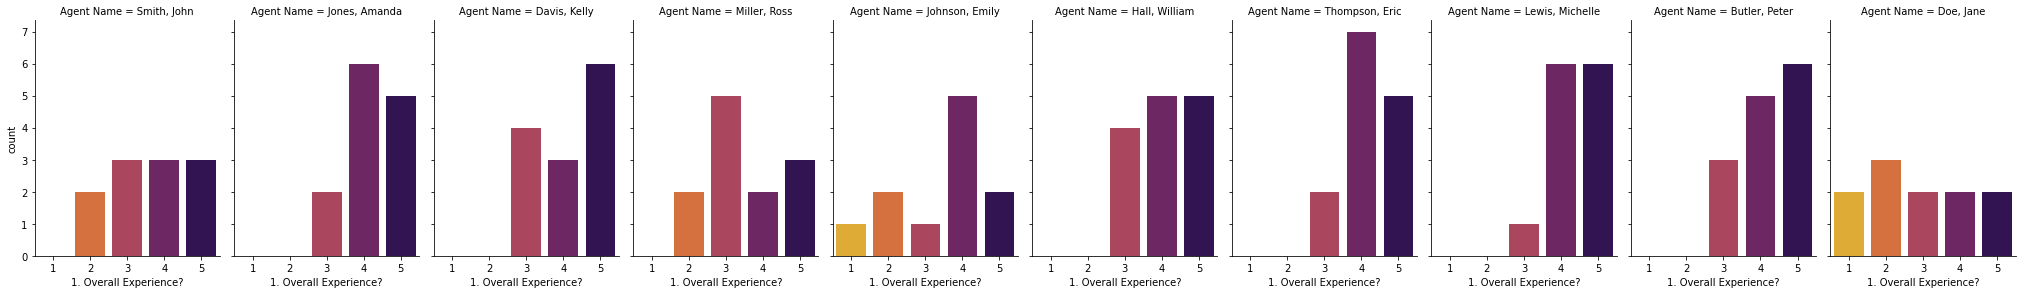

In [61]:
# see each agent overall satifaction level.
Agent_rate_name = sns.catplot(x="1. Overall Experience?", col="Agent Name",
                data=df2_merge, kind="count",
                height=4, aspect=.7, palette="inferno_r");

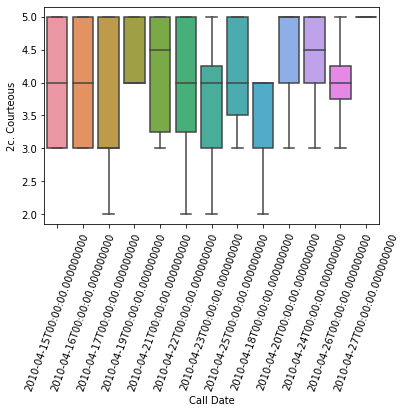

In [26]:
# boxplot the call date mean overall satisfaction.
boxplot_date_mean= sns.boxplot(x="Call Date", y="2c. Courteous", data= df2_merge)
boxplot_date_mean.set_xticklabels(boxplot_date_mean.get_xticklabels(),rotation=70);

* we can see that some call date have overall less courteous from the agents which will affect the customer satisfaction level.

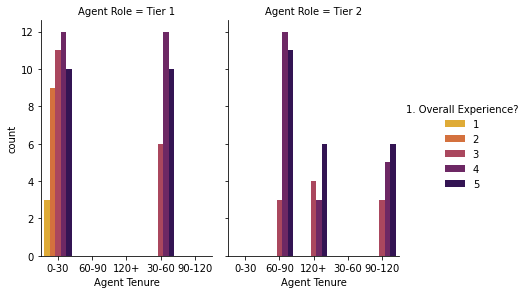

In [27]:
# scan based on agent role what are the satifaction level for different agent tenure.
Agent_rate = sns.catplot(x="Agent Tenure", hue="1. Overall Experience?", col="Agent Role",
                data=df2_merge, kind="count",
                height=4, aspect=.7, palette="inferno_r");

* the charts indicats that the highest count= are for the agents who work from 0-30 days in organization.
* the highest unsatisfaied clients are which who dealing with agent in tier 1 in which they are under 30 days of work.
* all tier 2 agents are getting very good satisfaction level , with no below 3 rate.

# Data Preprocessing

In this section i will go prepare the data to fit to the model, that will happen by creating dummies for all categorical variables. In addtion, drop the columns that are not nessery to add.  As the model of logistic regression will understand 1 or 0 so i will change the data as follow:
   from 1 to 3 will be change as customer are not satisfied.
   from 4 to 5 will be change as customer are satisfied.

In [28]:
# creat new columns that contian the dummies of Call Reason, Call Resolution, and Agent Role to fit into the model.
df_final= pd.get_dummies(df2_merge, columns=['Call Reason','Call Resolution','Agent Role'])
df_final.head()

,Account Number,Interaction ID,Call Date,Agent ID,1. Overall Experience?,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable,Agent Name,Agent Tenure,Call Reason_Add Services,Call Reason_Billing Dispute,Call Reason_Billing Question,Call Reason_Cancel Service,Call Reason_Change Plan,Call Reason_Handset Question,Call Reason_Make Payment,Call Reason_Service Question,Call Resolution_Activate Handset,Call Resolution_Add Minutes,Call Resolution_Add Text,Call Resolution_Cancel Service,Call Resolution_Change Plan,Call Resolution_Credit Account,Call Resolution_Explain Bill (no changes made),Call Resolution_Phone Disconnect,Call Resolution_Process Payment,Call Resolution_Transfer (Other Dept),Agent Role_Tier 1,Agent Role_Tier 2
0,9000001,1234501,2010-04-15,1,3,2,1,3,1,"Smith, John",0-30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,9000031,1234506,2010-04-15,1,4,3,3,4,4,"Smith, John",0-30,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,9000060,1234521,2010-04-16,1,2,4,3,5,4,"Smith, John",0-30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,9000024,1234525,2010-04-17,1,3,4,4,3,4,"Smith, John",0-30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,9000025,1234542,2010-04-19,1,5,5,4,5,5,"Smith, John",0-30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [29]:
# To be able to see the overall satisfaction we will take 1,2,3 rate  as not satisfaied , and 4,5 are satisfaied
# replace each column with the rates from 1 to 5
df_final['1. Overall Experience?']= df_final['1. Overall Experience?'].replace([1,2,3,4,5],[0,0,0,1,1])
df_final['2a. Agent Quality of Service']= df_final['2a. Agent Quality of Service'].replace([1,2,3,4,5],[0,0,0,1,1])
df_final['2b. Resolve Issue']= df_final['2b. Resolve Issue'].replace([1,2,3,4,5],[0,0,0,1,1])
df_final['2c. Courteous']= df_final['2c. Courteous'].replace([1,2,3,4,5],[0,0,0,1,1])
df_final['2d. Knowledgeable']= df_final['2d. Knowledgeable'].replace([1,2,3,4,5],[0,0,0,1,1])

In [30]:
#show the results
df_final.head()

,Account Number,Interaction ID,Call Date,Agent ID,1. Overall Experience?,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable,Agent Name,Agent Tenure,Call Reason_Add Services,Call Reason_Billing Dispute,Call Reason_Billing Question,Call Reason_Cancel Service,Call Reason_Change Plan,Call Reason_Handset Question,Call Reason_Make Payment,Call Reason_Service Question,Call Resolution_Activate Handset,Call Resolution_Add Minutes,Call Resolution_Add Text,Call Resolution_Cancel Service,Call Resolution_Change Plan,Call Resolution_Credit Account,Call Resolution_Explain Bill (no changes made),Call Resolution_Phone Disconnect,Call Resolution_Process Payment,Call Resolution_Transfer (Other Dept),Agent Role_Tier 1,Agent Role_Tier 2
0,9000001,1234501,2010-04-15,1,0,0,0,0,0,"Smith, John",0-30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,9000031,1234506,2010-04-15,1,1,0,0,1,1,"Smith, John",0-30,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,9000060,1234521,2010-04-16,1,0,1,0,1,1,"Smith, John",0-30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,9000024,1234525,2010-04-17,1,0,1,1,0,1,"Smith, John",0-30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,9000025,1234542,2010-04-19,1,1,1,1,1,1,"Smith, John",0-30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [31]:
# Drop the unnesserary columns.
df_final.drop(df_final.columns[[0,1,9,10]],axis=1, inplace=True)
df_final.head()

,Call Date,Agent ID,1. Overall Experience?,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable,Call Reason_Add Services,Call Reason_Billing Dispute,Call Reason_Billing Question,Call Reason_Cancel Service,Call Reason_Change Plan,Call Reason_Handset Question,Call Reason_Make Payment,Call Reason_Service Question,Call Resolution_Activate Handset,Call Resolution_Add Minutes,Call Resolution_Add Text,Call Resolution_Cancel Service,Call Resolution_Change Plan,Call Resolution_Credit Account,Call Resolution_Explain Bill (no changes made),Call Resolution_Phone Disconnect,Call Resolution_Process Payment,Call Resolution_Transfer (Other Dept),Agent Role_Tier 1,Agent Role_Tier 2
0,2010-04-15,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,2010-04-15,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2010-04-16,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,2010-04-17,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2010-04-19,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [32]:
# Split the data into training and test sets
X= df_final.iloc[:,3:27]
y= df_final.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
#see the correlation between variables.
df_final.corr()

,Agent ID,1. Overall Experience?,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable,Call Reason_Add Services,Call Reason_Billing Dispute,Call Reason_Billing Question,Call Reason_Cancel Service,Call Reason_Change Plan,Call Reason_Handset Question,Call Reason_Make Payment,Call Reason_Service Question,Call Resolution_Activate Handset,Call Resolution_Add Minutes,Call Resolution_Add Text,Call Resolution_Cancel Service,Call Resolution_Change Plan,Call Resolution_Credit Account,Call Resolution_Explain Bill (no changes made),Call Resolution_Phone Disconnect,Call Resolution_Process Payment,Call Resolution_Transfer (Other Dept),Agent Role_Tier 1,Agent Role_Tier 2
Agent ID,1.000000,0.030279,0.042449,-7.359574e-02,0.067010,-0.064548,0.007956,0.009945,-7.801791e-04,-0.111596,0.014206,0.123487,0.004469,-0.031873,0.140326,0.010169,-0.021238,0.135767,-0.048234,-0.111809,-1.261566e-02,-0.020119,0.011864,0.008806,-0.000769,0.000769
1. Overall Experience?,0.030279,1.000000,0.183024,2.549250e-01,0.736846,0.236360,-0.072836,0.072836,-1.428426e-02,0.024617,0.069560,-0.062456,-0.008614,0.024617,-0.074605,0.186187,0.113662,-0.062456,0.069560,0.113662,8.709060e-02,-0.172525,0.041774,-0.391555,-0.222732,0.222732
2a. Agent Quality of Service,0.042449,0.183024,1.000000,2.913428e-01,0.209117,0.542990,-0.182089,0.127462,-8.094412e-02,0.085435,0.069560,0.087439,-0.008614,0.024617,0.023314,0.138212,0.063411,0.087439,0.006049,0.113662,3.407893e-02,0.023314,-0.016710,-0.391555,-0.222732,0.222732
2b. Resolve Issue,-0.073596,0.254925,0.291343,1.000000e+00,0.061611,0.275647,-0.071429,0.035714,-4.898985e-17,-0.019881,0.145330,0.024500,-0.073914,0.039762,-0.064018,0.109778,0.229972,0.024500,0.083045,0.131413,1.731532e-17,-0.064018,-0.114708,-0.361403,-0.125048,0.125048
2c. Courteous,0.067010,0.736846,0.209117,6.161113e-02,1.000000,0.067005,-0.135544,0.061611,-2.416587e-02,0.014209,0.060375,0.004226,0.067034,0.014209,0.017355,0.076911,-0.000405,-0.071850,0.060375,0.101611,7.559103e-02,-0.082040,0.090461,-0.272764,-0.125791,0.125791
2d. Knowledgeable,-0.064548,0.236360,0.542990,2.756468e-01,0.067005,1.000000,-0.350823,0.162882,-1.032031e-01,0.003487,0.182089,0.073058,0.145212,0.066260,0.011230,0.013754,0.037458,0.073058,0.050985,-0.014407,1.732651e-01,0.011230,0.080484,-0.340744,-0.169497,0.169497
Call Reason_Add Services,0.007956,-0.072836,-0.182089,-7.142857e-02,-0.135544,-0.350823,1.000000,-0.250000,-1.961161e-01,-0.218692,-0.207614,-0.171499,-0.325222,-0.218692,-0.128037,0.454794,0.410665,-0.171499,-0.207614,-0.279252,-2.599376e-01,-0.128037,-0.229416,0.225877,-0.079576,0.079576
Call Reason_Billing Dispute,0.009945,0.072836,0.127462,3.571429e-02,0.061611,0.162882,-0.250000,1.000000,-9.805807e-02,-0.109346,-0.103807,-0.085749,-0.162611,-0.109346,-0.064018,-0.148984,-0.139626,0.355247,-0.103807,0.303892,1.819563e-01,-0.064018,-0.114708,-0.158114,0.045472,-0.045472
Call Reason_Billing Question,-0.000780,-0.014284,-0.080944,-4.898985e-17,-0.024166,-0.103203,-0.196116,-0.098058,1.000000e+00,-0.085778,-0.081433,-0.067267,-0.127562,-0.085778,-0.050220,-0.116873,-0.109532,-0.067267,0.260585,0.161076,1.835207e-01,-0.050220,-0.089984,-0.124035,0.111473,-0.111473
Call Reason_Cancel Service,-0.111596,0.024617,0.085435,-1.988107e-02,0.014209,0.003487,-0.218692,-0.109346,-8.577797e-02,1.000000,-0.090807,-0.075011,-0.142247,-0.095652,-0.056001,-0.130326,-0.122140,0.293223,0.221238,0.124753,5.994692e-02,-0.056001,-0.100343,-0.138313,-0.021245,0.021245


# Logistic Regression

I will check multiable models to get the most accuret and coherent model.
* the independent variable is = overall experiance
* the dependent variable is = all other variable 
  

**Hypothsis test are :**

1- there is positive strong relationship between overall experiance and agent quality of services.

2- there is positive strong relationship between overall experiance and Resolve Issue.

3- there is positive strong relationship between overall experiance and Courteous.

4- there is positive strong relationship between overall experiance and Knowledgeable.

In [34]:
# as we prepared the data i will add it to the model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# see the overall accuracy of the results.
classifier.score(X_train,y_train)

0.93

In [36]:
# create the confusion matrix to see the accuracy of the model
# by using the test split as indicator for prediction.
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 6  2]
 [ 0 18]]


In [37]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [38]:
# i will use different library package to check the accuracy and see in more detials what are the 
# most significant variables.
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                              
Dep. Variable:     1. Overall Experience?   R-squared:                       0.689
Model:                                OLS   Adj. R-squared:                  0.626
Method:                     Least Squares   F-statistic:                     10.98
Date:                    Thu, 03 Jun 2021   Prob (F-statistic):           5.71e-18
Time:                            11:31:45   Log-Likelihood:                -7.9709
No. Observations:                     126   AIC:                             59.94
Df Residuals:                         104   BIC:                             122.3
Df Model:                              21                                         
Covariance Type:                nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

* the results indicats that R^2 =around 70% which mean those variables represent and explain around 70% of the indpendant variable which is overall experiance.

* as the model contian too many variables that are not significant in term of their p-value so we will look at the significant one only to get the more accuret results and well persentation.

In [39]:
#by trying different and many depentant variables those are the most significant in term of overall experiance.
X_2= df_final[['2c. Courteous','2b. Resolve Issue','2d. Knowledgeable']]
y_2= df_final.iloc[:,2]

In [40]:
X3 = sm.add_constant(X_2)
est = sm.OLS(y_2, X3)
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                              
Dep. Variable:     1. Overall Experience?   R-squared:                       0.605
Model:                                OLS   Adj. R-squared:                  0.596
Method:                     Least Squares   F-statistic:                     62.37
Date:                    Thu, 03 Jun 2021   Prob (F-statistic):           1.63e-24
Time:                            11:31:45   Log-Likelihood:                -23.002
No. Observations:                     126   AIC:                             54.00
Df Residuals:                         122   BIC:                             65.35
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

* the results indicats that R^2 are around 60%.
* Courteous, Resolve Issue, and Knowledgeable are the main factors that affect the overall experiance.
* the highest significant level is with courteouse, so the courteous factor affect the most overall experiance.
* when the courteous increase by 1 the customer satisfaction increase 0.73 holding everything else constant.

**Trying different model to see if the call resolution are representing the rate of resolve issue variable**

In [41]:
# build new data for the model
df_Resolve_issue= df_final[['2b. Resolve Issue','Call Resolution_Process Payment','Call Resolution_Transfer (Other Dept)']]
df_Resolve_issue.shape

(126, 3)

In [42]:
X_3= df_Resolve_issue.iloc[:,1:3]
y_3= df_Resolve_issue.iloc[:,0]

In [43]:
# create the model and fit it.
X4 = sm.add_constant(X_3)
est = sm.OLS(y_3, X4)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      2b. Resolve Issue   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     11.64
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           2.35e-05
Time:                        11:31:45   Log-Likelihood:                -73.109
No. Observations:                 126   AIC:                             152.2
Df Residuals:                     123   BIC:                             160.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

* The R^2 is around 0.15 which is very low and can not explain the indepeendent variable.
* we can not use this model as it is not significant to use.


# Conclusions



**I can see many insights from the results , charts and models that i used during this project.**
  
  *As the main goal is to see the what are the main reason to decrease of customer satisfaction and increase the call volume so we should see what is the average rate for the main 4 factors. I found out that,  the mean of overall satisfaction is around 3.9 that is almost the same for agent quality of service and resolve issue, but it is around 4.0 for courteous and knowledgeable.*

  
**First**,

*the main reason customer calling for is Adding new services to their account (33%) in the same time it is getting the highest level of unsatisfaction level. I  can say that indicats that customers are mainly calling for adding services but they didn't get the services as they expected* 


**Second**,

*the courteouse of the agent plays significant role in customer satisfaction level . so when agent are more polite and courtrouse with the clinet that increase the satifaction level. In line with that, the courteouse could vary from day to day - as indicated in the chart - that could be for many reason could be the load of work that day.*

**Third**,

*when customer got transfered to other department that decrease the overall experiance, and the majorty of agents who are handlling that are Tiar 1 agents who are working for less that 60 days in the company. In addition, the satisfaction level are mainly decrease when they dealing with 0-30 Tiar 1 agents.*


**Forth**,

*the main attributes that affect the model of logistic regression are Courteous, Resolve Issue, and Knowledgeable. that means, wheen customers got a courteouse agent , who solved their issue and knowledgeable with all sevices that company provied that will signifacitly increase the customer satisfaction. moreover, the agent quality of services are not that important in the model.*

*furthermore, we reject the fist hypothesis test with agent quality of services but acceprt the 3 others that mean there is positive stronge relationship.*




**Recommendations**,

As recommendation for that project.
*  the company should make tiar 2 agent take more phone calls as they are more experiance than tiar 1. 
* the agents should solve the issue as soon as they arrive it with out transfer it to other department and the phone call should not disconnected while the resolve the issue cause that decrease the customer satifaction level.
* the level of courteous should be constant for all days so the customer get the same servies all the time and the satisfaction level mintain the same.


**limitation**,

the main limitation of this project is the relativly small data set which could not fully represensentive for all the data.


